In [1]:
# 引入TensorFlow 2.0框架
import tensorflow as tf
import numpy as np

from tensorflow import keras
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [2]:
# 加载并处理训练数据
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data(path="mnist.npz")

train_images = train_images / 255.0
test_images = test_images / 255.0

In [3]:
# 创建模型，定义网络结构
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [4]:
# 编译模型，定义优化方法、损失函数等
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
# 训练模型，训练10个epochs
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 936us/step - loss: 0.2587 - accuracy: 0.9261
Epoch 2/10
1875/1875 [==============================] - 1s 788us/step - loss: 0.1127 - accuracy: 0.9668
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0781 - accuracy: 0.9767
Epoch 4/10
1875/1875 [==============================] - 2s 959us/step - loss: 0.0579 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 2s 908us/step - loss: 0.0454 - accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 2s 834us/step - loss: 0.0350 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 2s 835us/step - loss: 0.0289 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 2s 840us/step - loss: 0.0237 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 2s 883us/step - loss: 0.0188 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 1s 793us/

In [6]:
# 模型测试，在测试数据集上测试模型
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0801 - accuracy: 0.9794

Test accuracy: 0.9793999791145325


In [7]:
# 保存模型的权重和偏置参数到HDF5文件中
model.save('model.h5')

In [8]:
# 删除模型
del model

In [9]:
# 恢复模型
restored_model = tf.keras.models.load_model('model.h5')

In [11]:
# 测试恢复的模型
test_loss, test_acc = restored_model.evaluate(test_images,  test_labels, verbose=2)
print('\nRestored test accuracy:', test_acc)

313/313 - 0s - loss: 0.0801 - accuracy: 0.9794

Restored test accuracy: 0.9793999791145325


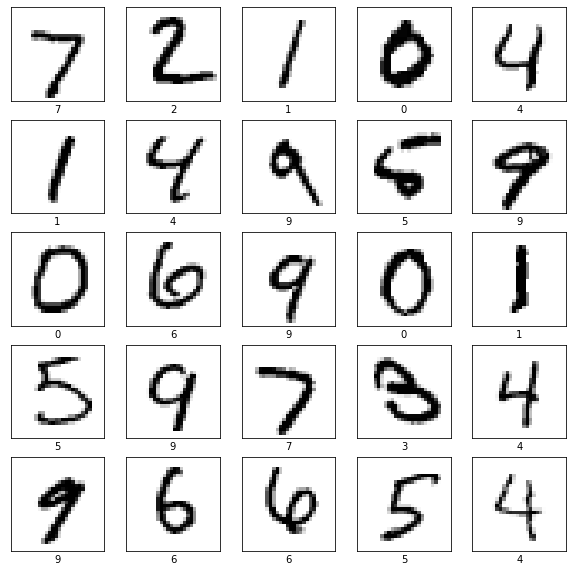

In [12]:
# 图形化展示测试结果
probability_model = tf.keras.Sequential([restored_model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(test_labels[i])
plt.show()